In [1]:
from importlib import reload
import flymovie as fm
from flymovie.simnuc import Sim
import cnn_models.siamese_cnn as cn
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import pickle
from pathlib import Path
import scipy.ndimage as ndi
from importlib import reload
import tensorflow as tf
import scipy
import pandas as pd
import sklearn

%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'cnn_models'

In [2]:
weights_file = '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/checkpoint_gpu_20220127_mip'
base_cnn = cn.make_base_cnn(image_shape=(100,100))
embedding = cn.make_embedding(base_cnn)
embedding.load_weights(weights_file)

2022-02-01 10:02:40.780303: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
cache_dir = Path('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/test_sims_realnuc_50_iAKPibSh')
train_dataset, val_dataset = cn.make_triplet_inputs(cache_dir, mip=True)

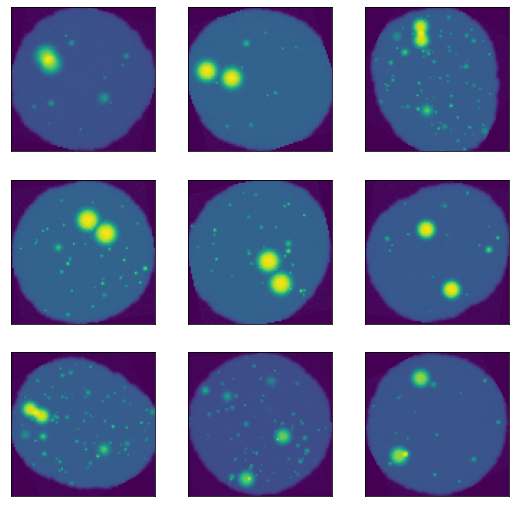

In [26]:
def visualize(anchor, positive, negative):
    """Visualize a few triplets from the supplied batches."""
    def show(ax, image):
        ax.imshow(image, vmin=0, vmax=1)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    fig = plt.figure(figsize=(9, 9))

    axs = fig.subplots(3, 3)
    for i in range(3):
        show(axs[i, 0], anchor[i])
        show(axs[i, 1], positive[i])
        show(axs[i, 2], negative[i])

#sample = next(iter(train_dataset))        

visualize(*list(train_dataset.take(1).as_numpy_iterator())[0])

In [38]:
dataset = train_dataset
for batch in dataset:
    a, p, n = batch
    for i in range(a.shape[0]):
        a_embedding = embedding(np.expand_dims(a[i], axis=0))
        p_embedding = embedding(np.expand_dims(p[i], axis=0))
        n_embedding = embedding(np.expand_dims(n[i], axis=0))
        positive_distance = scipy.spatial.distance.euclidean(a_embedding, p_embedding)
        negative_distance = scipy.spatial.distance.euclidean(a_embedding, n_embedding)
        print(negative_distance, positive_distance)
    #print(batch[2].shape)

2.402956485748291 0.620955228805542
4.711304187774658 0.33013907074928284
1.871391773223877 0.4369702637195587
1.5565191507339478 1.0861800909042358
3.037092685699463 0.2844908535480499
2.5534520149230957 0.7174862027168274
2.431307554244995 0.35156625509262085
1.265167236328125 0.28590378165245056
4.097706317901611 0.5392274260520935
4.129064083099365 0.20119017362594604
1.2515946626663208 0.24517348408699036
1.3911818265914917 1.3593225479125977
0.5055583715438843 0.4745383858680725
1.7376049757003784 0.7225892543792725
3.1306591033935547 0.4479674696922302
3.1364188194274902 0.38142549991607666
2.185450553894043 0.9121476411819458
3.6998510360717773 0.2584919333457947
3.334784984588623 0.7655988335609436
0.175964817404747 0.5318536162376404
6.1565446853637695 0.2725299894809723
3.0841734409332275 0.6842796802520752
2.253528356552124 0.8627477884292603
0.8406636714935303 0.34664633870124817
2.1341779232025146 0.5336564779281616
2.373462438583374 0.6704509258270264
2.3421614170074463 

KeyboardInterrupt: 

In [20]:
[n], axis=0)
        positive = np.expand_dims(positive[n], axis=0)
        negative = np.expand_dims(negative[n], axis=0)
        anchor_embedding, positive_embedding, negative_embedding = (
            embedding(preprocess_image(anchor)),
            embedding(preprocess_image(positive)),
            embedding(preprocess_image(negative)),
        )

        cosine_similarity = tf.keras.metrics.CosineSimilarity()

        positive_distance = scipy.spatial.distance.euclidean(anchor_embedding, positive_embedding)
        negative_distance = scipy.spatial.distance.euclidean(anchor_embedding, negative_embedding)
        #print('positive: ' + str(positive_similarity))
        #print('negative: ' + str(negative_similarity))

        positive_similarity = cosine_similarity(anchor_embedding, positive_embedding)
        #print("Positive similarity:", positive_similarity.numpy())

        negative_similarity = cosine_similarity(anchor_embedding, negative_embedding)
        #print("Negative similarity", negative_similarity.numpy())

        if positive_similarity > negative_similarity:
            good_sim +=1
        if negative_distance > positive_distance:
            good_dist +=1

        #fm.viewer([anchor * 1000, positive * 1000, negative * 1000], 3)
print(good_sim, good_dist)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 8)

In [21]:

    sample = next(iter(train_dataset))
    #visualize(*sample)

    anchor, positive, negative = sample
    anchor = anchor.numpy()
    positive = positive.numpy()
    negative = negative.numpy()
    anchor = np.expand_dims(anchor[0], axis=0)
    positive = np.expand_dims(positive[0], axis=0)
    negative = np.expand_dims(negative[0], axis=0)
    anchor_embedding, positive_embedding, negative_embedding = (
        embedding(preprocess_image(anchor)),
        embedding(preprocess_image(positive)),
        embedding(preprocess_image(negative)),
    )

    cosine_similarity = tf.keras.metrics.CosineSimilarity()

    positive_similarity = scipy.spatial.distance.euclidean(anchor_embedding, positive_embedding)
    negative_similarity = scipy.spatial.distance.euclidean(anchor_embedding, negative_embedding)
    print('positive: ' + str(positive_similarity))
    print('negative: ' + str(negative_similarity))

    #positive_similarity = cosine_similarity(anchor_embedding, positive_embedding)
    #print("Positive similarity:", positive_similarity.numpy())

    #negative_similarity = cosine_similarity(anchor_embedding, negative_embedding)
    #print("Negative similarity", negative_similarity.numpy())
    fm.viewer([anchor * 1000, positive * 1000, negative * 1000], 3)

NameError: name 'preprocess_image' is not defined

In [211]:
# Calculate the embeddings of some input images.
folder = '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/simstempOyEWlFDU'
files = os.listdir(folder)
params = np.ndarray((0,12))
embed = np.ndarray((0,256))
for f in files:
    if f[3] != '_':
        continue
    
    im = fm.load_pickle(os.path.join(folder, f))
    im = preprocess_image(im)
    im = np.expand_dims(im, axis=0)
    e = embedding(im).numpy()
    p= f.split('_')[1:-1]
    p = [float(x) for x in p]
    params = np.vstack([params, p])
    embed = np.vstack([embed, e])

In [212]:
params.shape

(2000, 12)

In [213]:
cols = ('nuc_bg', 'nonnuc_bg', 'noise_sigma', 'nblobs', 'blob_intensity', 'blob_intensity_std', 'blob_sigma_base', 'blob_sigma_k', 
        'blob_sigma_theta', 'hlb_intensity', 'hlb_sigma', 'hlb_p')
params = pd.DataFrame(params, columns=cols)


In [175]:
from sklearn.decomposition import PCA
pca = sklearn.decomposition.FastICA(n_components=4)
pca.fit(embed - np.min(embed))
#pca.explained_variance_ratio_


FastICA(n_components=4)

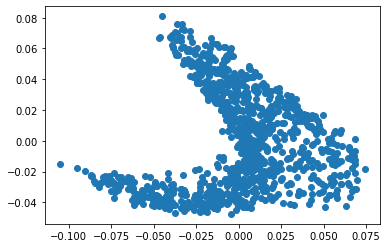

In [183]:
X = pca.transform(embed - np.min(embed))
plt.scatter(X[:,2], X[:,3])

In [215]:
params_norm = np.apply_along_axis(lambda x: x / np.mean(x),0,params)

def nearest(data, params, n):
    ref = data[n]
    f = lambda x: scipy.spatial.distance.euclidean(x, ref)
    dists = np.apply_along_axis(f, 1, data)
    indxs = np.argsort(dists)

    return params[indxs], dists[indxs]

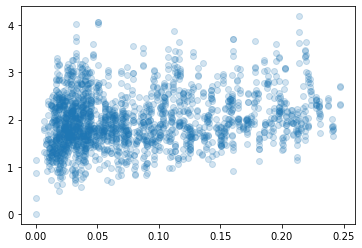

In [228]:
n = 10
p, d = nearest(embed, params_norm, n)
p = (p - params_norm[n]) ** 2
p = np.apply_along_axis(np.mean, 1, p)
plt.scatter(p, d, alpha=0.2)

In [190]:
for n in range(len(embed)):
    params_near, _ = nearest(embed, params, n)
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

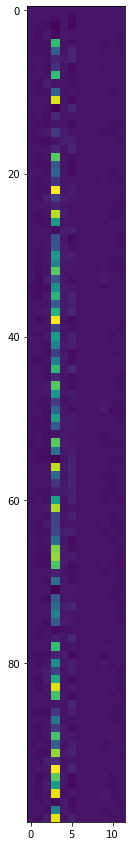

In [93]:
n = 0
p, d = nearest(embed, params, n)
# Normalize
p = np.apply_along_axis(lambda x: x / np.mean(x), 0, p)
#p[:,3] = 0
plt.subplots(figsize=(15,15))
plt.imshow(p[:100,:] / p[n])

In [230]:
np.loadtxt('/Users/michaelstadler/Bioinformatics/Projects/insulators/viewer_data/viewer_files/hic-72/2R_22400000_28800000_16000.txt.gz')

array([[123.0174  ,  10.37149 ,   2.812344, ...,   0.      ,   0.      ,
          0.      ],
       [ 10.37149 , 115.5076  ,  14.68487 , ...,   0.      ,   0.      ,
          0.      ],
       [  2.812344,  14.68487 ,  92.78245 , ...,   0.      ,   0.      ,
          0.      ],
       ...,
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ]])

In [3]:
im = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/simstempacULekHl/test_mip/aeG_9482.2_882.4_300.0_98.8_8623.9_2372.7_0.5_0.5_0.5_24395.1_4.7_2.2_rep1.pkl')
fm.viewer(im, 4)

interactive(children=(Dropdown(description='Color', index=8, options=('gray_r', 'Greens', 'inferno', 'prism', …

In [2]:
im = fm.read_czi('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/counting_blobs/cycle 12/embryo17.czi', swapaxes=False)
nuc1 = im[:,120:220,200:300]

In [3]:
nuc_bg_mean = 9_000
nonnuc_bg_mean = 1_000
hlb_intensity = 55_000
hlb_sigma = 3.8
hlb_p = 2.3
nblobs = 500
blob_intensity_mean = 6_000
blob_intensity_std = 3_000
blob_sigma_base = 1
blob_sigma_k = 0.5
blob_sigma_theta = 0.5
noise_sigma = 2_000
z_ij_ratio=2.94

mask = Sim.make_dummy_mask(40,100,100,200,45, z_ij_ratio)
sim = Sim(mask, z_ij_ratio)
sim.add_background(val=nuc_bg_mean)
sim.add_background(inverse=True, val=nonnuc_bg_mean)
sim.smooth_edges(1)
sim.add_hlb(hlb_intensity, hlb_sigma, hlb_p)
sim.add_nblobs(nblobs, blob_intensity_mean, blob_intensity_std, 
    sigma_base=blob_sigma_base, sigma_k=blob_sigma_k, 
    sigma_theta=blob_sigma_theta)
sim.add_noise(sigma=noise_sigma)

sim.im[sim.im < 0] = 0
sim.im[sim.im > 65_536] = 65_536

fm.viewer([nuc1 * 256, sim.im], 4)  

interactive(children=(Dropdown(description='Color', index=4, options=('gray_r', 'viridis', 'Gators', 'Reds', '…